In [2]:
# 데이터로더 생성을 위한 라이브러리 불러오기
from mmcv.utils import Config
from mmdet.datasets import build_dataset, build_dataloader
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torch

/opt/conda/lib/python3.8/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: pl_ssun. Use `wandb login --relogin` to force relogin
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


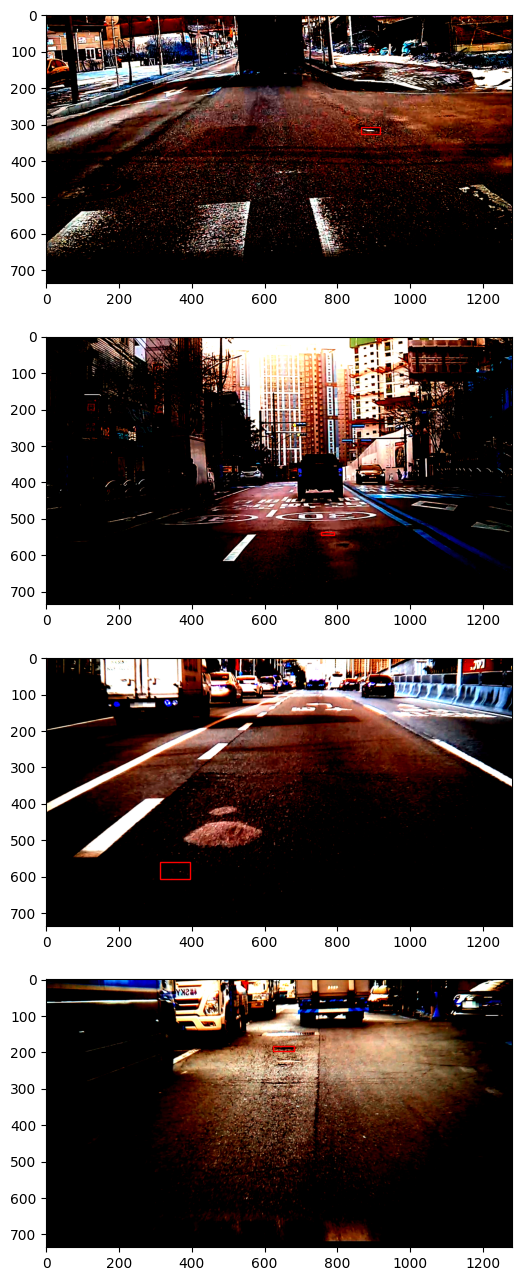

In [3]:
# ver.train
config_file = '/opt/ml/final-project-level3-cv-03/script/cascade_effib0.py'
how_much = 4

cfg = Config.fromfile(config_file)
datasets = build_dataset(cfg.data.train)

# 초기 n개 이미지를 box와 함께 관찰
fig = plt.figure(figsize=(16, 8*(how_much/2)))
for idx, val in enumerate(datasets):
    ax1 = fig.add_subplot(how_much, 2, 2*idx+1)
    img = val['img']._data.permute(1, 2, 0)
    img_rgb = torch.stack([img[:, :, 2], img[:, :, 1], img[:, :, 0]], dim=2)
    
    min_x, min_y, max_x, max_y = val['gt_bboxes']._data[0]
    width, height = max_x - min_x, max_y - min_y
    ax1.add_patch(patches.Rectangle((min_x, min_y), width, height,
                                    edgecolor = 'red', fill=False))
    
    ax1.imshow(img_rgb)
    if idx == how_much-1:
        break

plt.show()